In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install plotly

In [5]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS

## <strong>EDA to business.pkl file</strong>

In [6]:
# Read the the file business.pkl
buss = pd.read_pickle('/content/drive/MyDrive/Yelp/business.pkl')

# Print the table
print("Table: \n")
display(buss.head())

# Print the info
display(buss.info())

Table: 



,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 28 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
 14  business_id   5 non-null       object
 15  name          5 non-null       object
 16  address       5 non-null       object
 17  city          5 non-null       object
 18  state         5 non-null

None

In [7]:
# Some is repeated, we delete them
buss = buss.loc[:,~buss.columns.duplicated()].copy()

#print first five records
display(buss.head())

# Print the info
display(buss.info())

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,attributes,categories,hours
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,NaN,93101,34.426679,-119.711197,5.0,7,0,{'ByAppointmentOnly': 'True'},"Doctors, Traditional Chinese Medicine, Naturop...",None
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,NaN,63123,38.551126,-90.335695,3.0,15,1,{'BusinessAcceptsCreditCards': 'True'},"Shipping Centers, Local Services, Notaries, Ma...","{'Monday': '0:0-0:0', 'Tuesday': '8:0-18:30', ..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,NaN,85711,32.223236,-110.880452,3.5,22,0,"{'BikeParking': 'True', 'BusinessAcceptsCredit...","Department Stores, Shopping, Fashion, Home & G...","{'Monday': '8:0-22:0', 'Tuesday': '8:0-22:0', ..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,CA,19107,39.955505,-75.155564,4.0,80,1,"{'RestaurantsDelivery': 'False', 'OutdoorSeati...","Restaurants, Food, Bubble Tea, Coffee & Tea, B...","{'Monday': '7:0-20:0', 'Tuesday': '7:0-20:0', ..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,MO,18054,40.338183,-75.471659,4.5,13,1,"{'BusinessAcceptsCreditCards': 'True', 'Wheelc...","Brewpubs, Breweries, Food","{'Wednesday': '14:0-22:0', 'Thursday': '16:0-2..."


<class 'pandas.core.frame.DataFrame'>
Int64Index: 150346 entries, 0 to 150345
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   business_id   150346 non-null  object
 1   name          150346 non-null  object
 2   address       150346 non-null  object
 3   city          150346 non-null  object
 4   state         150343 non-null  object
 5   postal_code   150346 non-null  object
 6   latitude      150346 non-null  object
 7   longitude     150346 non-null  object
 8   stars         150346 non-null  object
 9   review_count  150346 non-null  object
 10  is_open       150346 non-null  object
 11  attributes    136602 non-null  object
 12  categories    150243 non-null  object
 13  hours         127123 non-null  object
dtypes: object(14)
memory usage: 17.2+ MB


None

### We plot the null to delete later

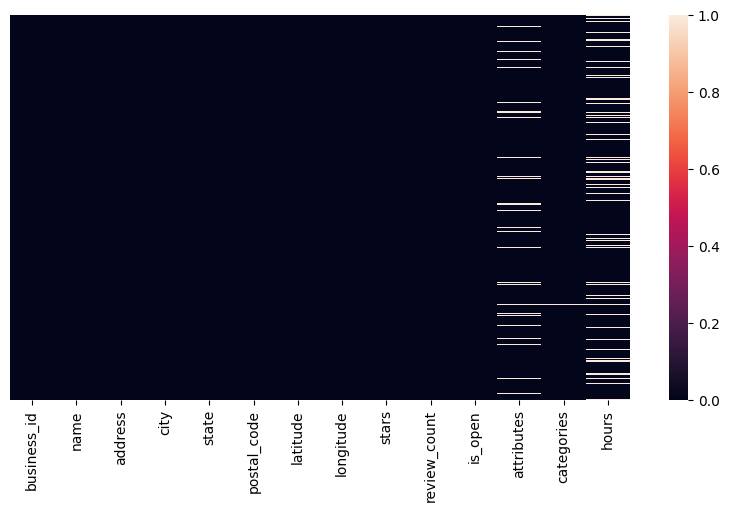

In [8]:
# plot the null values
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(data=buss.isnull(), yticklabels=False)

plt.show()

In [9]:
# Check out duplicated valued in business_id column
buss['business_id'].duplicated().value_counts()

False    150346
Name: business_id, dtype: int64

In [10]:
# Drop the hours column
try:
  for column_name in ['hours', 'postal_code']:
    buss.drop(columns=[column_name], axis=1, inplace=True)
except Exception as e:
  print(e)

# Drop nulls in attributes column
try:
  buss.dropna(subset=['attributes'], inplace=True)
  buss.reset_index(drop=True, inplace=True)
except Exception as e:
  print(e)

# Drop nulls in state column
try:
  buss.dropna(subset=['state'], inplace=True)
  buss.reset_index(drop=True, inplace=True)
except Exception as e:
  print(e)

# Transform categories values to list
buss['categories'] = buss['categories'].apply(lambda val: str(val).split(', '))
buss['categories'] = buss['categories'].apply(lambda val: val[:2])

In [11]:
# We create a dataframe with dummie data from multicategorical columns (attributes)
attributes_dummies = pd.get_dummies(buss['attributes'].explode()).groupby(level=0).sum()
attributes_dummies.insert(0, "business_id", buss['business_id'])
attributes_dummies.insert(0, "stars", buss['stars'])

In [12]:
# We create a dataframe with dummie data from multicategorical columns (categories)

cat_dummies = pd.get_dummies(buss['categories'].explode()).groupby(level=0).sum()
cat_dummies.insert(0, "business_id", buss['business_id'])

In [13]:
# Drop the attribute and categories columns due they are in dummies
try:
  for column_name in ['attributes', 'categories']:
    buss.drop(columns=[column_name], axis=1, inplace=True)
except Exception as e:
  print(e)

In [14]:
# Set the right data type
buss['review_count'] = buss['review_count'].apply(lambda x: int(x))
buss['is_open'] = buss['is_open'].apply(lambda x: int(x))
buss['stars'] = buss['stars'].apply(lambda x: float(x))
buss['latitude'] = buss['latitude'].apply(lambda x: float(x))
buss['longitude'] = buss['longitude'].apply(lambda x: float(x))
buss['city'] = buss['city'].apply(lambda x: x.upper())

In [15]:
#Plot the locations of bussiness

import plotly.express as px

fig = px.scatter_mapbox(buss, lat="latitude", lon="longitude", zoom=4, height=700)
#hover_name="City", hover_data=["State", "Population"],
#color_discrete_sequence=["fuchsia"])
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

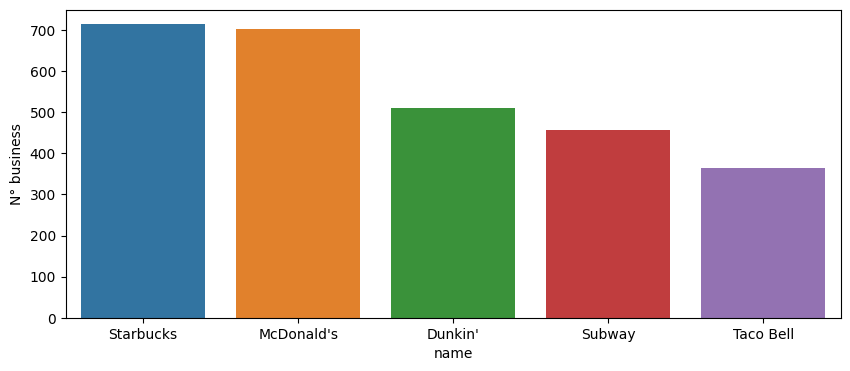

In [16]:
#the most numerous business
the_most = buss.groupby(by='name', as_index=False).count().sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'business_id'), x='name', y='business_id')
plt.ylabel('N° business')

plt.show()

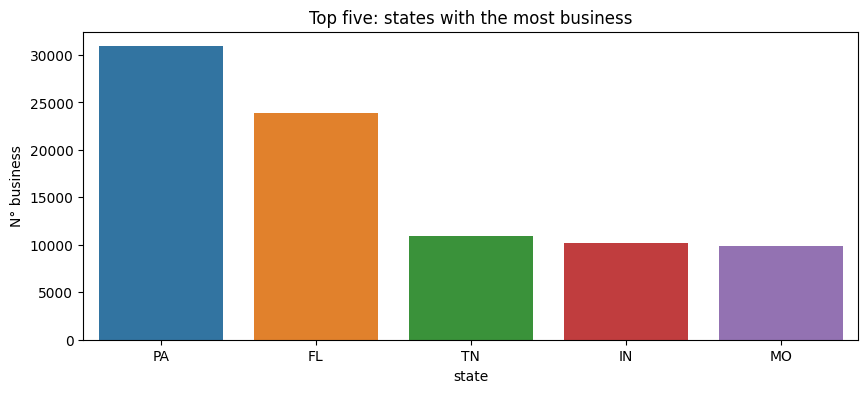

In [17]:
#State with the most of business
the_most = buss.groupby(by='state', as_index=False).count().sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'business_id'), x='state', y='business_id')
plt.ylabel('N° business')
plt.title("Top five: states with the most business")

plt.show()

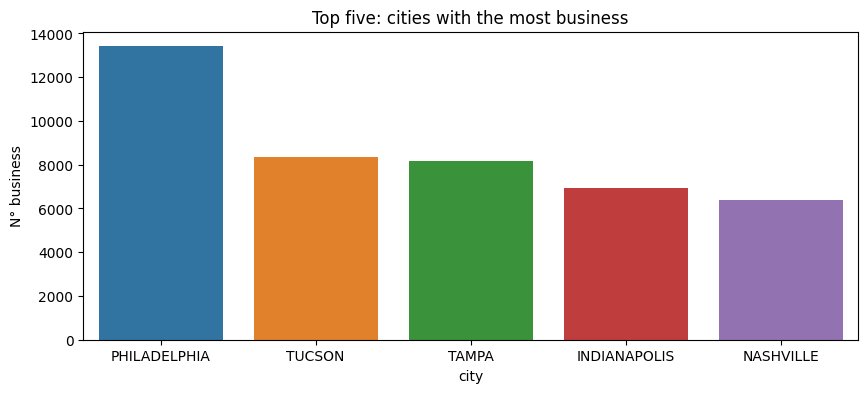

In [18]:
#City with the most of business
the_most = buss.groupby(by='city', as_index=False).count().sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'business_id'), x='city', y='business_id')
plt.ylabel('N° business')
plt.title("Top five: cities with the most business")

plt.show()

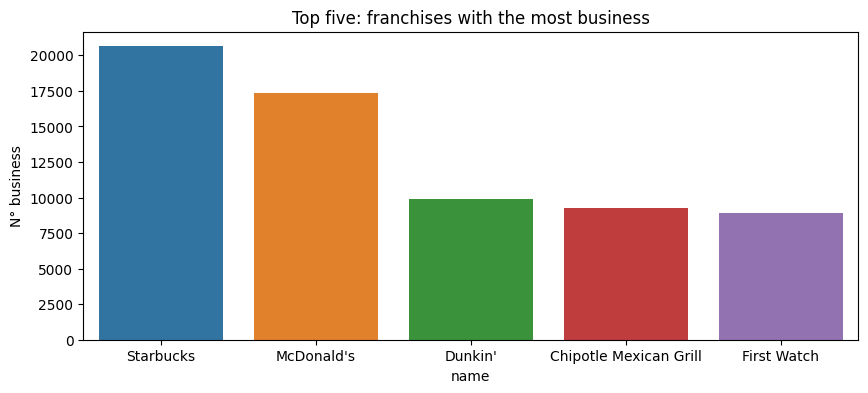

In [19]:
# The most reviewed business
the_most = buss.groupby(by='name', as_index=False).sum(numeric_only=True).sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'review_count'), x='name', y='review_count')
plt.ylabel('N° business')
plt.title("Top five: franchises with the most business")

plt.show()

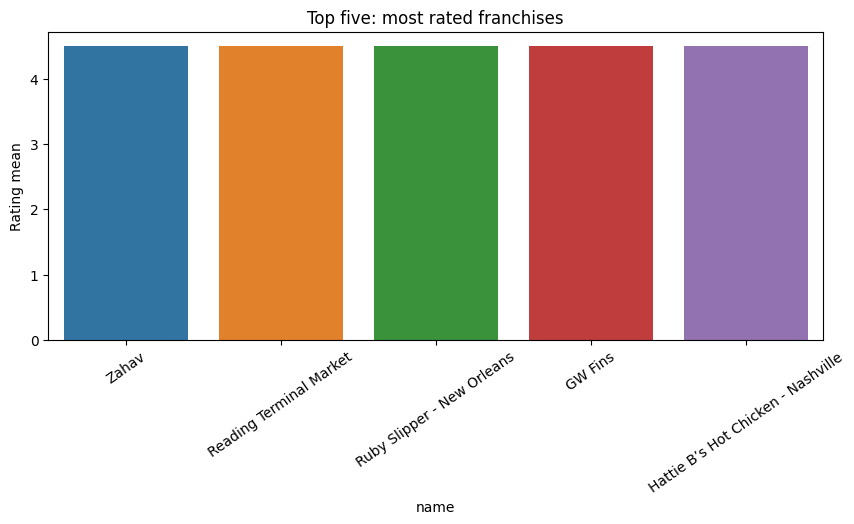

In [20]:
# The most rated business with review_count greater than 2000
the_most = buss[buss['review_count']>2000].groupby(by='name', as_index=False).mean(numeric_only=True).sort_values(by='stars', ascending=False)

plt.figure(figsize=(10,4), dpi=100)
sns.barplot(data=the_most.nlargest(5, 'stars'), x='name', y='stars')
plt.ylabel('Rating mean')
plt.xticks(rotation=35)
plt.title("Top five: most rated franchises")

plt.show()

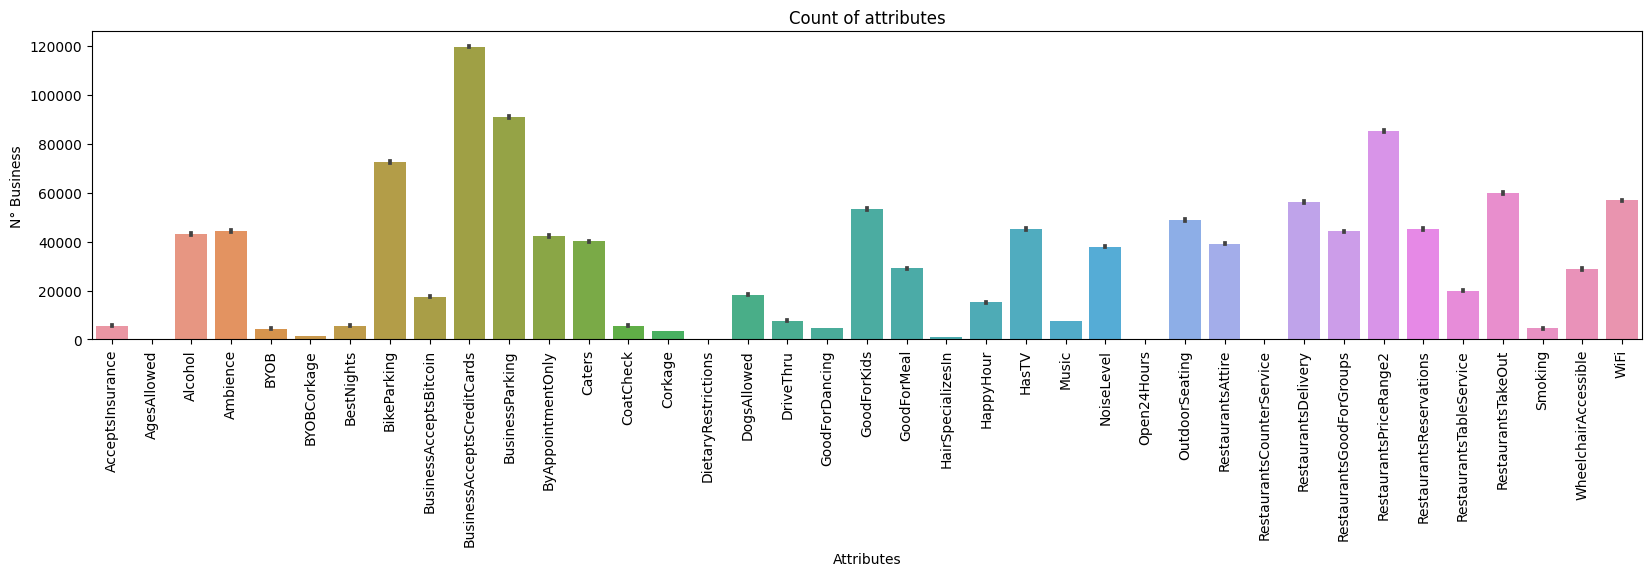

In [21]:
plt.figure(figsize=(20,4), dpi=100)
ax = sns.barplot(
    data=attributes_dummies.drop(columns=['business_id', 'stars']),
    estimator='sum'
)
plt.xticks(rotation=90)
plt.xlabel('Attributes')
plt.ylabel('N° Business')
plt.title('Count of attributes')

plt.show()

# EDA to user file

In [22]:
# Read the the file user.parquet
user_yelp = pd.read_parquet('/content/drive/MyDrive/Yelp/user.parquet')

# Print the table
print("Table: \n")
display(user_yelp.head())

# Print the info
display(user_yelp.info())

Table: 



,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105597 entries, 0 to 2105596
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 353.4+ MB


None

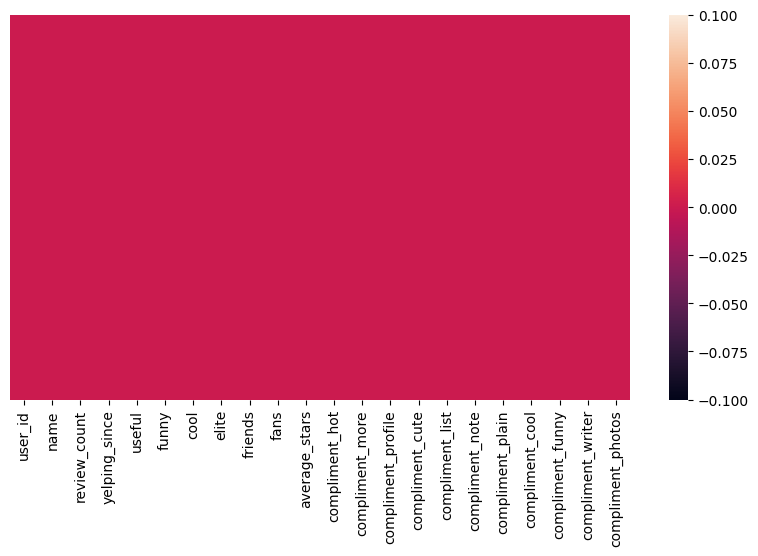

In [23]:
# plot the null values
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(data=user_yelp.isnull(), yticklabels=False)

plt.show()

In [24]:
user_yelp.describe()

,review_count,useful,funny,cool,fans,average_stars,compliment_hot,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
count,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06,2.105597e+06
mean,2.846875e+01,5.516853e+01,2.267667e+01,3.143013e+01,1.913746e+00,3.641863e+00,2.444596e+00,3.968618e-01,2.532631e-01,1.858665e-01,9.631663e-02,1.921464e+00,4.124809e+00,3.805567e+00,3.805567e+00,1.459133e+00,1.499514e+00
std,1.042146e+02,7.388068e+02,4.628811e+02,6.379274e+02,2.436510e+01,1.159519e+00,7.963704e+01,1.405658e+01,1.767698e+01,1.170051e+01,1.049796e+01,6.177753e+01,1.364953e+02,1.057484e+02,1.057484e+02,3.676692e+01,9.607754e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.880000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.900000e+01,1.500000e+01,3.000000e+00,4.000000e+00,0.000000e+00,4.500000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.747300e+04,2.062960e+05,1.858230e+05,1.998780e+05,1.249700e+04,5.000000e+00,2.578400e+04,1.350100e+04,1.418000e+04,1.365400e+04,1.266900e+04,5.903100e+04,1.010970e+05,4.996700e+04,4.996700e+04,1.593400e+04,8.263000e+04


# EDA to tip.json file

In [25]:
# Read the the file business.pkl
tip = pd.read_json('/content/drive/MyDrive/Yelp/tip.json', lines=True)

# Print the table
print("Table: \n")
display(tip.head())

# Print the info
display(tip.info())

Table: 



,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908915 entries, 0 to 908914
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_id           908915 non-null  object        
 1   business_id       908915 non-null  object        
 2   text              908915 non-null  object        
 3   date              908915 non-null  datetime64[ns]
 4   compliment_count  908915 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 34.7+ MB


None

### In order to make a word cloud we ue the following piece of code

In [26]:
# Start with one review:
text = " ".join(review for review in tip.loc[0:800000].text)

# Create stopword list:
stopwords = set(STOPWORDS)

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)

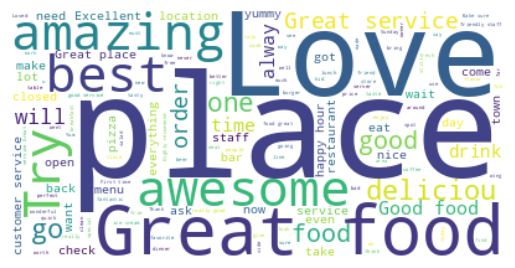

In [27]:
# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

### We apreciate that the most use words are positive words.

### We want to know what it is the distribution of tips by year

In [31]:
tip[tip['date'].dt.year.isin([2020,2021,2022,2023])]

,user_id,business_id,text,date,compliment_count
140690,y_FNlAwKwAYgRgF-D3GZ_A,6Uu74gvylXUYRYllKUDKNw,"Everything I've had was on point, fresh flavor...",2020-05-02 15:08:29,0
153420,37ZVcZNpHU0WZ_T3IewJeA,TFnGJlA5l_HDdzGDkNTdTA,Love the character and neighborhood feel to th...,2020-01-17 01:49:42,0
153421,JtV6pkzT2bAJN6C0kyT5Ww,T4-vocFpzwlIxAQIi22FFA,Food so good!!,2020-01-19 05:57:51,0
153422,ScuWOAFGiCSDkZPI4x5mAQ,YJn_vbvLVLySH3ZdMYlSsQ,My favorite McDonalds,2020-01-22 19:36:55,0
153423,dH5621mQHTMNRfJO7-s03Q,45siW2fI0Cuv5ZKCS23knA,"Their ""no name"" coffee is the best ! The oils...",2020-01-23 14:36:32,0
...,...,...,...,...,...
908910,eYodOTF8pkqKPzHkcxZs-Q,3lHTewuKFt5IImbXJoFeDQ,Disappointed in one of your managers.,2021-09-11 19:18:57,0
908911,1uxtQAuJ2T5Xwa_wp7kUnA,OaGf0Dp56ARhQwIDT90w_g,Great food and service.,2021-10-30 11:54:36,0
908912,v48Spe6WEpqehsF2xQADpg,hYnMeAO77RGyTtIzUSKYzQ,Love their Cubans!!,2021-11-05 13:18:56,0
908913,ckqKGM2hl7I9Chp5IpAhkw,s2eyoTuJrcP7I_XyjdhUHQ,Great pizza great price,2021-11-20 16:11:44,0


In [38]:
tip[tip['date'].dt.year == 2016]

,user_id,business_id,text,date,compliment_count
7,YVBB9g23nuVJ0u44zK0pSA,jtri188kuhe_AuEOJ51U_A,This is probably the best place in the cool Sp...,2016-11-22 22:14:58,0
18,I6aRZ4sE7ixv0_2r3-XvGw,c5nLy7YgXG-IIrOmqJv1nA,This is the bomb ! I love this dish. Try it yo...,2016-04-23 02:44:03,0
23,Ba1I_wRHRQzvuyFU4PwPrw,ZhCnKe7U1TsHWnAlXl8Isw,The pimento cheese tastes great and is a large...,2016-05-02 17:59:57,0
24,tA1U-XSh9woo73eQmWGyAQ,xHwvbm1SJwtaZtOZzFQcmQ,If you haven't been here in a good while or i...,2016-06-11 23:18:23,1
26,VQro7KJpsspqEO68ilIJAw,FpwmIq3Gpo6hGIrOOv8lTw,Allow yourself time to wait on your food,2016-01-11 04:07:33,0
...,...,...,...,...,...
908854,bRVQXvB3gM5BSBVerirs0g,ZCcxLiy8-tJ_ddndgYxWYQ,Pizza not to good. Excellent bread sticks.,2016-03-26 04:53:44,0
908866,gdHtwCW0cxxk2hvX7r2MeA,YcbICqp_TlaxNx7gIkRSzw,French Toast for Brunch is yummy!,2016-10-11 05:04:07,0
908881,-CCxo4jazXjh4_Z7fpcU0A,HjtnQzXz7F0YhgxBjnVepA,If you love your pet PLEASE stay away from thi...,2016-08-29 09:06:21,0
908884,5MgH8z5fyIL8ylzXX8JMpQ,xxlbRiWWQkk-6LST3Hd12g,Best burger I've had in a while -- prices and ...,2016-02-23 20:19:30,0


### The most tips was issued before 2019

EDA review yelp

In [ ]:
# Read the the file business.pkl
rev = pd.read_json(
    '/content/drive/MyDrive/Yelp/review.json',
    lines=True,
    nrows=500000
)

rev

In [ ]:
rev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   review_id    100000 non-null  object        
 1   user_id      100000 non-null  object        
 2   business_id  100000 non-null  object        
 3   stars        100000 non-null  int64         
 4   useful       100000 non-null  int64         
 5   funny        100000 non-null  int64         
 6   cool         100000 non-null  int64         
 7   text         100000 non-null  object        
 8   date         100000 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(4)
memory usage: 6.9+ MB
